<a href="https://www.kaggle.com/code/fabriciopatrocinio/updated-eda-health-care-products-amazon-ratings?scriptVersionId=160032250" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-products-dataset/Gaming Consoles.csv
/kaggle/input/amazon-products-dataset/Car Electronics.csv
/kaggle/input/amazon-products-dataset/Janitorial and Sanitation Supplies.csv
/kaggle/input/amazon-products-dataset/All Electronics.csv
/kaggle/input/amazon-products-dataset/All Books.csv
/kaggle/input/amazon-products-dataset/Make-up.csv
/kaggle/input/amazon-products-dataset/Travel Accessories.csv
/kaggle/input/amazon-products-dataset/Indian Language Books.csv
/kaggle/input/amazon-products-dataset/Car and Bike Care.csv
/kaggle/input/amazon-products-dataset/Sunglasses.csv
/kaggle/input/amazon-products-dataset/Bags and Luggage.csv
/kaggle/input/amazon-products-dataset/Yoga.csv
/kaggle/input/amazon-products-dataset/Sportswear.csv
/kaggle/input/amazon-products-dataset/Fiction Books.csv
/kaggle/input/amazon-products-dataset/Exam Central.csv
/kaggle/input/amazon-products-dataset/Home Storage.csv
/kaggle/input/amazon-products-dataset/Toys Gifting Store.csv
/kaggle/input/amazon-pr

In [2]:
df = pd.read_csv("/kaggle/input/amazon-products-dataset/Health and Personal Care.csv")

df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Cetaphil Oily Skin Cleanser , Daily Face Wash ...",beauty & health,Health & Personal Care,https://m.media-amazon.com/images/I/718NOimjca...,https://www.amazon.in/Cetaphil-Cleanser-Oily-S...,4.3,"6,318",₹440,₹545
1,Kitchengenix's washing machine cleaning tablet...,beauty & health,Health & Personal Care,https://m.media-amazon.com/images/I/71yauf-Nbd...,https://www.amazon.in/Kitchengenixs-washing-cl...,4.3,217,₹165,₹999
2,Urbangabru Hair Removal cream Spray | Painless...,beauty & health,Health & Personal Care,https://m.media-amazon.com/images/I/71hvuVj6GM...,https://www.amazon.in/Urbangabru-Hair-Removal-...,4.2,"3,926",₹599,₹750
3,Kesh King Ayurvedic Anti Hairfall Hair Oil|Hai...,beauty & health,Health & Personal Care,https://m.media-amazon.com/images/I/71aiqTDRNG...,https://www.amazon.in/Kesh-King-Ayurvedic-Scal...,4.2,"18,350",₹226,₹349
4,"Harpic Bathroom Cleaner Liquid, Lemon - 1 Litr...",beauty & health,Health & Personal Care,https://m.media-amazon.com/images/I/61cE2Oo-ue...,https://www.amazon.in/Harpic-Bathroom-Cleaner-...,4.4,"10,744",₹340.10,₹358


In [3]:
df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [4]:
df['main_category'].value_counts()

beauty & health    1104
Name: main_category, dtype: int64

In [5]:
df['sub_category'].value_counts()

Health & Personal Care    1104
Name: sub_category, dtype: int64

<b>>>>>> After analysis, I found that the 'main_category' and 'sub_category' columns do not add anything to our analysis</br>
as they contain only one value each, so the best thing to do is to delete them <<<<<</b>

In [6]:
df = df.drop(['main_category', 'sub_category', 'image'], axis=1).copy()

In [7]:
df.shape

(1104, 6)

In [8]:
df.isnull().sum()

name                0
link                0
ratings             5
no_of_ratings       5
discount_price    112
actual_price        6
dtype: int64

In [9]:
#Analyzing the data types of each column
df.dtypes

name              object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [10]:
from urllib.parse import urlparse
#Checking if the links in the table are valid
valid_links = True

for link in df['link']:
    result = urlparse(link)
    if result.scheme and result.netloc:
        continue
    else:
        valid_links = False
        print("Invalid link: " + link)
    
if valid_links:
    print('All links are valid!')

All links are valid!


In [11]:
#Treating the discount_price column

#Values such as '1.732.50' and '1.250.25' were causing errors when converted to float, so I decided to remove everything
#after the second dot, so they became '1.732' and '1.250'

#Conversion function
def convert_value(value):
    # remove the "₹" symbol
    value = value.replace('₹', '')
    # Replace comma with dot
    value = value.replace(',', '.')
    
    # Check if there are at least two dots
    if value.count('.') >= 2:
        # Remove everything after the second dot
        value = value.split('.', 2)
        value = f'{value[0]}.{value[1]}'

    # Convert to float
    return float(value)

#Calling the function for each value in the column
df['discount_price'] = df['discount_price'].astype(str).apply(convert_value)

#The discount_price column contains many null values, which means that not all products have a discount
#So the best way to handle this is to replace null values with zero, rather than deleting the rows

#Treating nulls in the discount_price column by replacing the null value with 0
df['discount_price'] = df['discount_price'].fillna(0)

df['discount_price'].describe()

count    1104.000000
mean      299.700042
std       240.783385
min         0.000000
25%       138.500000
50%       251.500000
75%       421.000000
max       999.000000
Name: discount_price, dtype: float64

In [12]:
#Treating the actual_price column using the same function as I used for discount_price, with the difference
#that in the actual_price column the null values will be removed.

df['actual_price'] = df['actual_price'].astype(str).apply(convert_value)

df['actual_price'] = df['actual_price'].dropna()

df['actual_price'].describe()

count    1098.000000
mean      351.984578
std       268.676184
min         1.000000
25%       160.000000
50%       300.000000
75%       499.750000
max       999.000000
Name: actual_price, dtype: float64

In [13]:
#Treating the nulls in the ratings and no_of_ratings
df['ratings'] = df['ratings'].replace('Get', np.nan)
df['ratings'] = df['ratings'].replace('', np.nan).astype('float')

df['no_of_ratings'] = df['no_of_ratings'].replace('FREE Delivery by Amazon', np.nan)
df['no_of_ratings'] = df['no_of_ratings'].astype(str).apply(convert_value)

#dropping products that don't have a review
df = df.dropna()

df.isnull().sum()

name              0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [14]:
#checking for duplicates
df.duplicated().sum()

0

# Ploting the Numerical columns

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,1092.0,4.173901,0.298432,2.4,4.000,4.2000,4.4000,5.0
no_of_ratings,1092.0,156.833941,253.353843,1.0,2.533,9.9315,224.5000,995.0
discount_price,1092.0,302.010620,240.463455,0.0,143.075,255.0000,423.2875,999.0
actual_price,1092.0,352.845941,268.751014,1.0,160.000,300.0000,500.0000,999.0


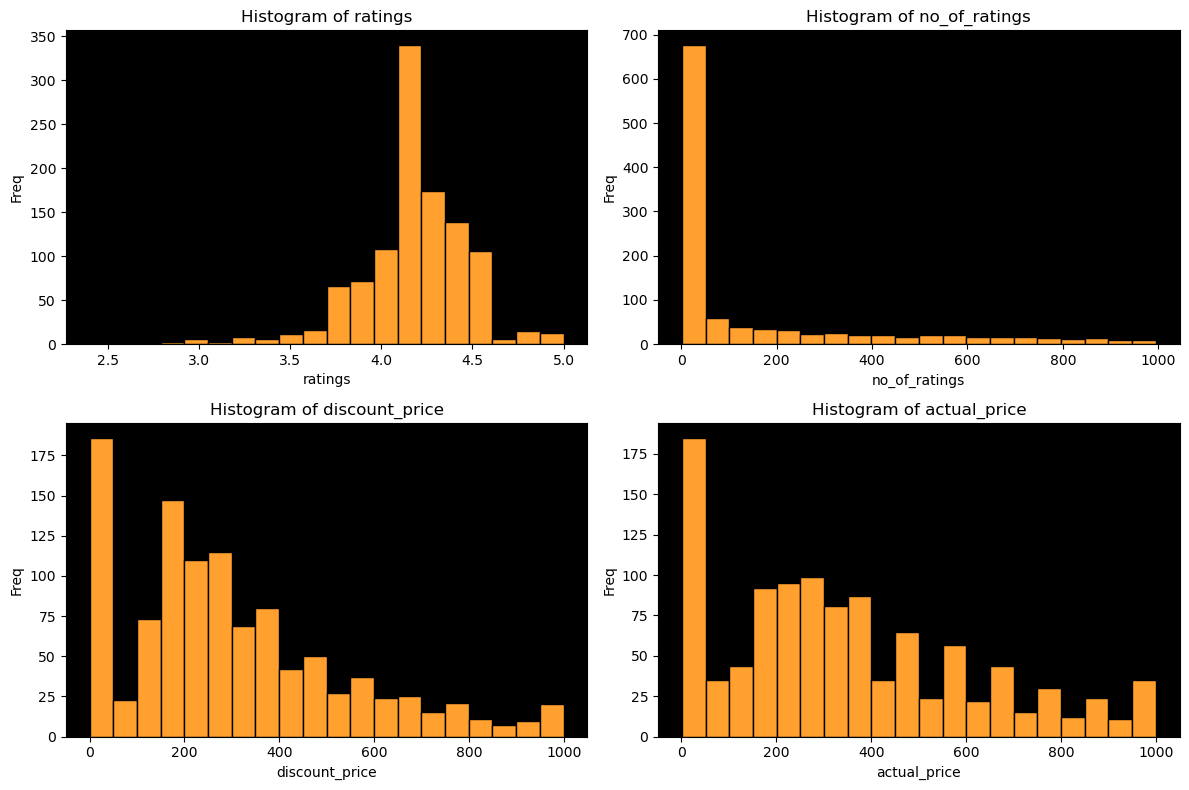

In [16]:
# find the numerics columns
numeric_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

orange = '#FFA02F'
#ploting histogram about numeric columns dispersion
for col, ax in zip(numeric_columns, axes.flatten()):
    ax.hist(df[col], bins=20, edgecolor='black', color=orange)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Freq')
    ax.set_facecolor('black')

plt.tight_layout()
plt.show()

# Word Cloud using Amazon Logo

![](https://images.hdqwalls.com/wallpapers/amazon-4k-logo-qhd.jpg)

Frist I will used the library WordCloud to make a word cloud about the most-used words in the products names of all my dataset,</br>
then I make a cloud to the top 100 ratings product and the bottom 100 ratings products as well.</br>

Take a look in those word cloud to gain insights about what words can help a product be well rating or more buy.

In [17]:
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from io import BytesIO

# Downloading the nltk stopwords
import nltk
nltk.download('stopwords')

# Importing stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

print("------------------------------------------#------------------------------------")

text = " ".join(review for review in df.name)
print ("There are {} words in the combination of all review.".format(len(text)))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
------------------------------------------#------------------------------------
There are 106061 words in the combination of all review.


In [18]:

# URL da imagem
url = "https://images.hdqwalls.com/wallpapers/amazon-4k-logo-qhd.jpg"
#url = "https://th.bing.com/th/id/R.1e0c27a9e976b2afb6f2397bed2f8206?rik=9FyYs3Dx5%2bzddA&pid=ImgRaw&r=0"

# Obtenha a imagem da URL
response = requests.get(url)

# Verifique se a solicitação foi bem-sucedida (código de status 200)
if response.status_code == 200:
    # Abra a imagem usando a PIL
    image = Image.open(BytesIO(response.content))

    # Salve a imagem localmente
    image.save("nome_da_imagem.jpg")

    print("Imagem salva com sucesso!")

else:
    print(f"Falha ao obter a imagem. Código de status: {response.status_code}")


Imagem salva com sucesso!


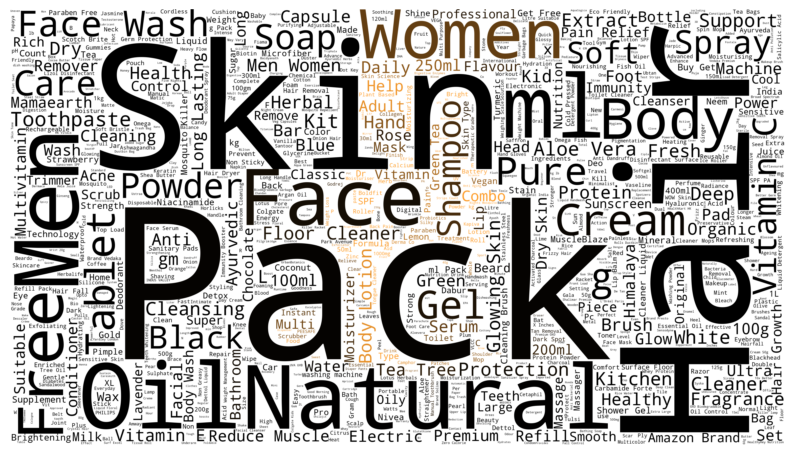

In [19]:
# Generate a word cloud image
mask = np.array(image)  # Open the image
wordcloud_amazon = WordCloud(stopwords=stop_words, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# Plot a word cloud based on Amazon Logo
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10, 8])
plt.imshow(wordcloud_amazon.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()

# Decoding Titles: A Visual Analysis of the Most Common Words in the Top and Bottom 100 Product Names

In this section, we delve into the heart of the reviews, examining the very essence of the products through their names.</br>
Through captivating visual analyses, we unveil the most prevalent words shaping the identities of both the top and bottom 100 products.</br>
First, we will explore the most frequently used words in the product names of the Top 100 reviews. Following that, our attention shifts to the worst-rated products, uncovering the most frequently used words in their names.

In [20]:
top_100_ratings = df.sort_values('ratings', ascending = False).head(100)

tops_text = " ".join(review for review in top_100_ratings.name)
print ("There are {} words in the combination of the Top 100 reviews.".format(len(tops_text)))

There are 10542 words in the combination of the Top 100 reviews.


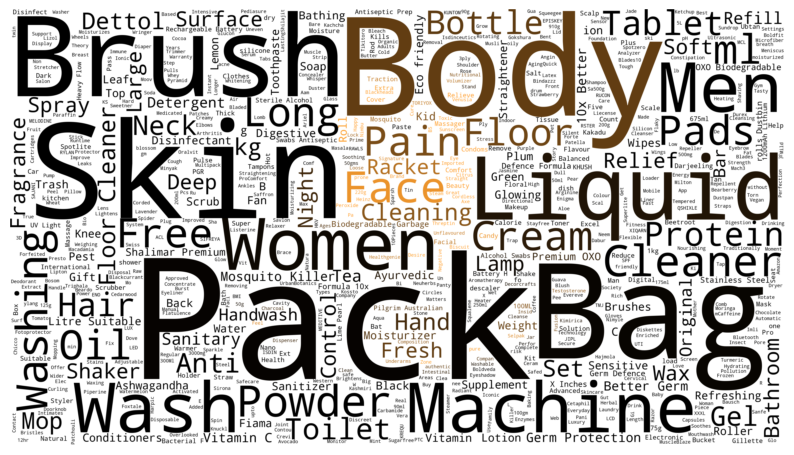

In [21]:
# Generate a word cloud image to the Top's 100 Well Ratings Products
wordcloud_amazon_top = WordCloud(stopwords=stop_words, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(tops_text)

# Ploting the word cloud
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10, 8])
plt.imshow(wordcloud_amazon_top.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()

In [22]:
worst_100_ratings = df.sort_values('ratings').head(100)

worsts_ratings_text = " ".join(review for review in worst_100_ratings.name)
print ("There are {} words in the combination of the Worst 100 reviews.".format(len(worsts_ratings_text)))

There are 10258 words in the combination of the Worst 100 reviews.


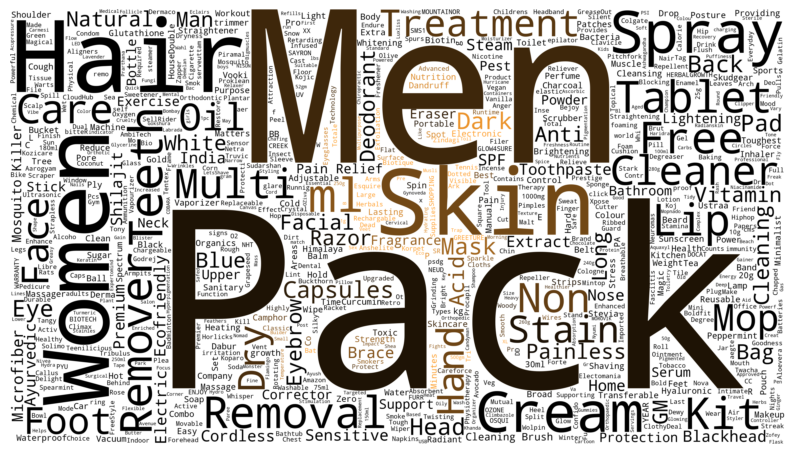

In [23]:
# Generate a word cloud image to the Worts 100 Ratings Products
wordcloud_amazon_worst = WordCloud(stopwords=stop_words, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(worsts_ratings_text)

# Ploting the word cloud
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10, 8])
plt.imshow(wordcloud_amazon_worst.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()

# Now with the data treated, let's get to the point:

### Let's answer some simple questions that can help us get to some bigger analysis.

What are the most expensive products?</br>
What are the cheapest products?</br>
What are the products with the best rating?</br>
What are the products with the worst rating?</br>

# Most expensive products.

In [24]:
#Most expensive products
#Gets the top 5 most expensive products
top5 = df.nlargest(5, 'actual_price')

#Prints the formatted results
print('Most expensive products:')
for index, row in top5.iterrows():
    print(f'Product: {row["name"]}')
    print(f'Discounted price: ₹{row["discount_price"]:.2f}')
    print(f'Original price: ₹{row["actual_price"]:.2f}')
    print(f'Rating: {row["ratings"]} ({row["no_of_ratings"]} ratings)')
    print(f'Link: {row["link"]}')
    print('------------------')

Most expensive products:
Product: Kitchengenix's washing machine cleaning tablet, Descaling Powder Tablets, washing machine deep cleaner, Deep Cleaner Table...
Discounted price: ₹165.00
Original price: ₹999.00
Rating: 4.3 (217.0 ratings)
Link: https://www.amazon.in/Kitchengenixs-washing-cleaning-Descaling-Companys/dp/B0BTBX95KP/ref=sr_1_122?qid=1679215338&s=hpc&sr=1-122
------------------
Product: Dettol Handwash No-Touch Automatic Soap Dispenser Device, 250ml with Aloe Vera Refill | Aloe Vera & Moisturizer | 10X Bett...
Discounted price: ₹599.40
Original price: ₹999.00
Rating: 4.4 (4.757 ratings)
Link: https://www.amazon.in/Dettol-Handwash-No-Touch-Automatic-Dispenser/dp/B096TSSMXL/ref=sr_1_1391?qid=1679215358&s=hpc&sr=1-1391
------------------
Product: GRANVILL Foot Care Plantar Fasciitis Arch Support Sleeves for foot pain,muscle relaxation with soft Cushion and Neoprene e...
Discounted price: ₹499.00
Original price: ₹999.00
Rating: 4.3 (2.472 ratings)
Link: https://www.amazon.in/GRA

# Products with the lowest prices.

In [25]:
#Obtain the 5 products with the lowest prices
bottom5 = df.nsmallest(5, 'actual_price')

#Print the formatted results
print('Products with the lowest prices:')
for index, row in bottom5.iterrows():
    print(f'Product: {row["name"]}')
    print(f'Discounted price: ₹{row["discount_price"]:.2f}')
    print(f'Original price: ₹{row["actual_price"]:.2f}')
    print(f'Rating: {row["ratings"]} ({row["no_of_ratings"]} ratings)')
    print(f'Link: {row["link"]}')
    print('------------------')

Products with the lowest prices:
Product: Neutriderm Moisturising Lotion w/Vitamin E - 125 mL
Discounted price: ₹0.00
Original price: ₹1.00
Rating: 4.4 (16.884 ratings)
Link: https://www.amazon.in/Neutriderm-Vitamin-Moisturising-Lotion-125/dp/B00GSXY6DU/ref=sr_1_128?qid=1679215338&s=hpc&sr=1-128
------------------
Product: Amazon Brand - Solimo Premium Walnut Kernels - Broken, 500g
Discounted price: ₹729.00
Original price: ₹1.00
Rating: 4.2 (2.625 ratings)
Link: https://www.amazon.in/Amazon-Brand-Solimo-Premium-Kernels/dp/B07LF8HCLL/ref=sr_1_1631?qid=1679215363&s=hpc&sr=1-1631
------------------
Product: Shri Ganesh Premium Camphor Bhimseni Camphor (250g X 1 Jar)
Discounted price: ₹480.00
Original price: ₹1.00
Rating: 4.3 (628.0 ratings)
Link: https://www.amazon.in/Shri-Ganesh-Premium-Camphor-Bhimseni/dp/B08LZTFVD4/ref=sr_1_2951?qid=1679215391&s=hpc&sr=1-2951
------------------
Product: Brylcreem Original Red Hair Cream 250Ml
Discounted price: ₹449.00
Original price: ₹1.00
Rating: 4.2 

# Top-rated products.

In [26]:
#Products with the best ratings
#to be fair, I set a minimum of 100 ratings

popular_products = df[df['no_of_ratings'] > 50]

top5 = popular_products.nlargest(5, 'ratings')

#Prints formatted results
print('Products with the best ratings:')
for index, row in top5.iterrows():
    print(f'Product: {row["name"]}')
    print(f'Discounted price: ₹{row["discount_price"]:.2f}')
    print(f'Original price: ₹{row["actual_price"]:.2f}')
    print(f'Rating: {row["ratings"]} ({row["no_of_ratings"]} ratings)')
    print(f'Link: {row["link"]}')
    print('------------------')

Products with the best ratings:
Product: RAWLS Hydrating Under Eye Cream Gel/Enriched with Aloe Vera Ext and Coffee Ext/Massage Roller to Reduce Dark Circles/No Pa...
Discounted price: ₹560.00
Original price: ₹700.00
Rating: 5.0 (81.0 ratings)
Link: https://www.amazon.in/RAWLS-Hydrating-Enriched-Massage-Sulphate/dp/B0BV6CP9SN/ref=sr_1_7188?qid=1679215485&s=hpc&sr=1-7188
------------------
Product: Pilgrim Australian 1% Vitamin C Toner for glowing skin with Kakadu Plum & Lime Pearl™ | Vitamin C toner for dry skin | Vit...
Discounted price: ₹255.00
Original price: ₹300.00
Rating: 4.9 (67.0 ratings)
Link: https://www.amazon.in/Pilgrim-Australian-Vitamin-tightening-refining/dp/B0BS6BX6QK/ref=sr_1_3245?qid=1679215421&s=hpc&sr=1-3245
------------------
Product: Boldfit Shakers for Protein Shake Shaker Bottles for Protein Shake Protein Shaker Bottle for Men & Women Gym Shaker Bottle...
Discounted price: ₹225.00
Original price: ₹799.00
Rating: 4.8 (156.0 ratings)
Link: https://www.amazon.in/Bo

# Worst rated products

In [27]:
worst_popular = df[df['no_of_ratings'] > 50]

worst5 = worst_popular.nsmallest(5, 'ratings')

#Prints formatted results
print('Products with worst ratings:')
for index, row in worst5.iterrows():
    print(f'Product: {row["name"]}')
    print(f'Discounted price: ₹{row["discount_price"]:.2f}')
    print(f'Original price: ₹{row["actual_price"]:.2f}')
    print(f'Rating: {row["ratings"]} ({row["no_of_ratings"]} ratings)')
    print(f'Link: {row["link"]}')
    print('------------------')

Products with worst ratings:
Product: Bejoy Foam Toothpaste Stain Removal Toothpaste for Sensitive Teeth, Snow Teeth foaming Whitening,Baking Soda Spearmint Whi...
Discounted price: ₹275.00
Original price: ₹500.00
Rating: 2.4 (51.0 ratings)
Link: https://www.amazon.in/Bejoy-Toothpaste-Sensitive-Whitening-Spearmint/dp/B0BGBZT2FR/ref=sr_1_3070?qid=1679215394&s=hpc&sr=1-3070
------------------
Product: PYU ENJOY SHOPPING Rotating Electric 360 Cordless Bathtub & Tile Scrubber Movable Surface Cleaner with 3 Replaceable Clean...
Discounted price: ₹1.25
Original price: ₹2.40
Rating: 2.9 (246.0 ratings)
Link: https://www.amazon.in/PYU-Rotating-Electric-Replaceable-Extension/dp/B08W8Y9KLB/ref=sr_1_9094?qid=1679215516&s=hpc&sr=1-9094
------------------
Product: OSQUI Ribbed Dotted Mutual Climax Over Time Condom (Pack of 4 Combo, He & She And ring)
Discounted price: ₹398.00
Original price: ₹999.00
Rating: 3.0 (97.0 ratings)
Link: https://www.amazon.in/OSQUI%C2%AE-Ribbed-Dotted-Mutual-Climax/dp/B0

# Scatter plot of no_of_ratings x ratings.

In [28]:
correlation_matrix = df[['ratings', 'no_of_ratings']].corr()
print(correlation_matrix)

                ratings  no_of_ratings
ratings        1.000000      -0.061722
no_of_ratings -0.061722       1.000000


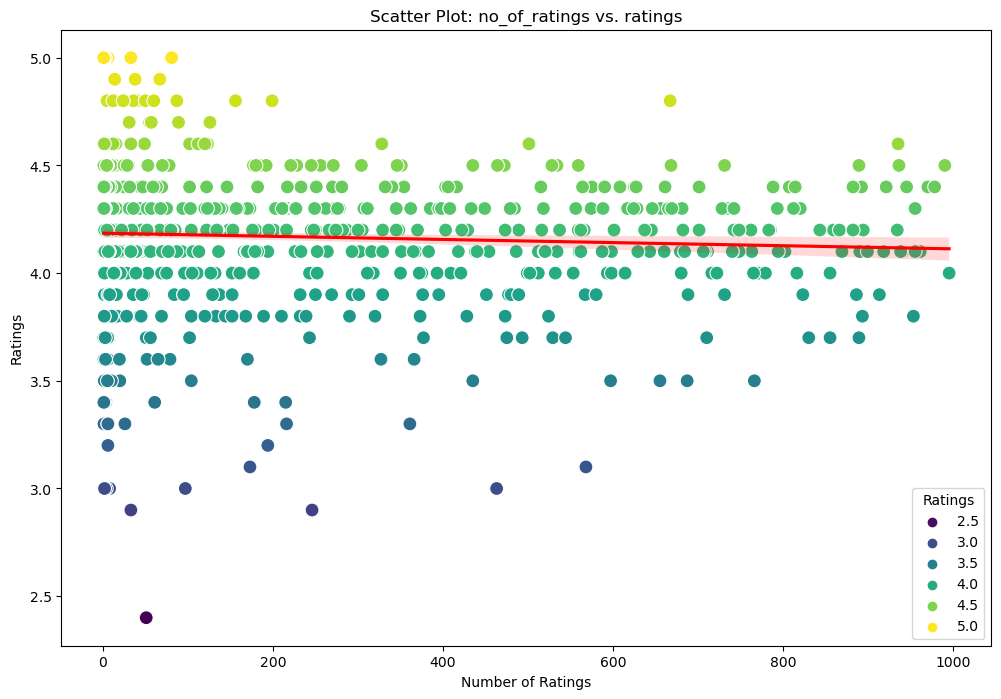

In [29]:
# Scatter plot no_of_ratings x ratings
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='no_of_ratings', y='ratings', data=df, hue='ratings', palette='viridis', s=100)
sns.regplot(x='no_of_ratings', y='ratings', data=df, scatter=False, ax=scatter_plot, line_kws={'color': 'red'})
plt.title('Scatter Plot: no_of_ratings vs. ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Ratings')
plt.legend(title='Ratings')
plt.show()

# Scatter plot of actual_price x ratings.

In [30]:
correlation_matrix = df[['ratings', 'actual_price']].corr()
print(correlation_matrix)

              ratings  actual_price
ratings       1.00000      -0.02213
actual_price -0.02213       1.00000


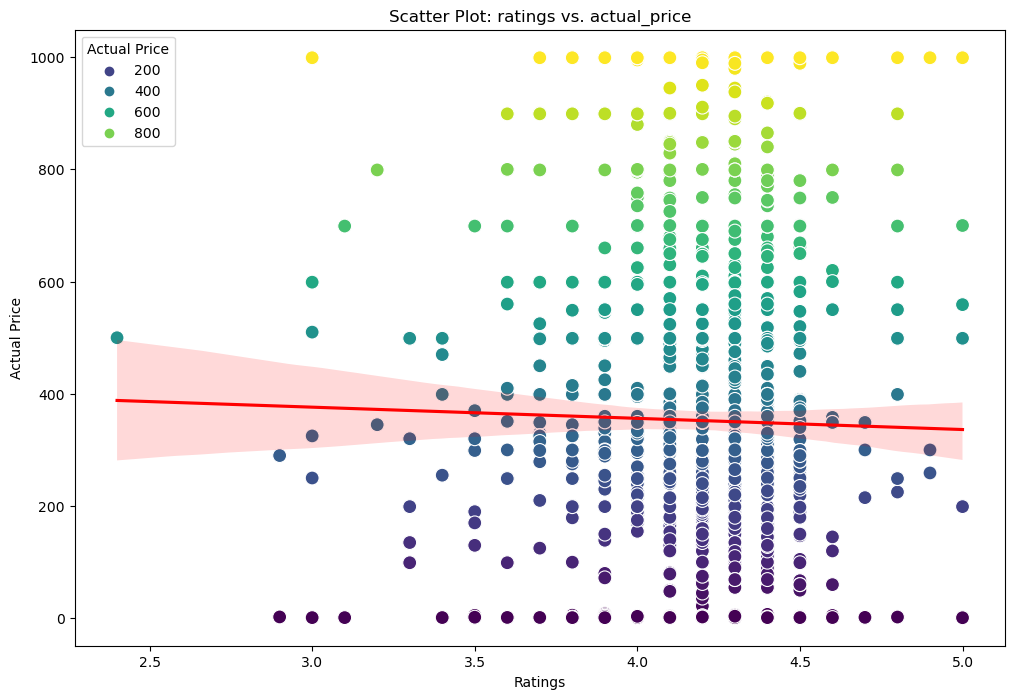

In [31]:
# Scatter plot actual_price x ratings
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='ratings', y='actual_price', data=df, hue='actual_price', palette='viridis', s=100)
sns.regplot(x='ratings', y='actual_price', data=df, scatter=False, ax=scatter_plot, line_kws={'color': 'red'})
plt.title('Scatter Plot: ratings vs. actual_price')
plt.xlabel('Ratings')
plt.ylabel('Actual Price')
plt.legend(title='Actual Price')
plt.show()

# Scatter plot of actual_price x no_of_ratings.

In [32]:
correlation_matrix = df[['no_of_ratings', 'actual_price']].corr()
print(correlation_matrix)

               no_of_ratings  actual_price
no_of_ratings       1.000000      0.019287
actual_price        0.019287      1.000000


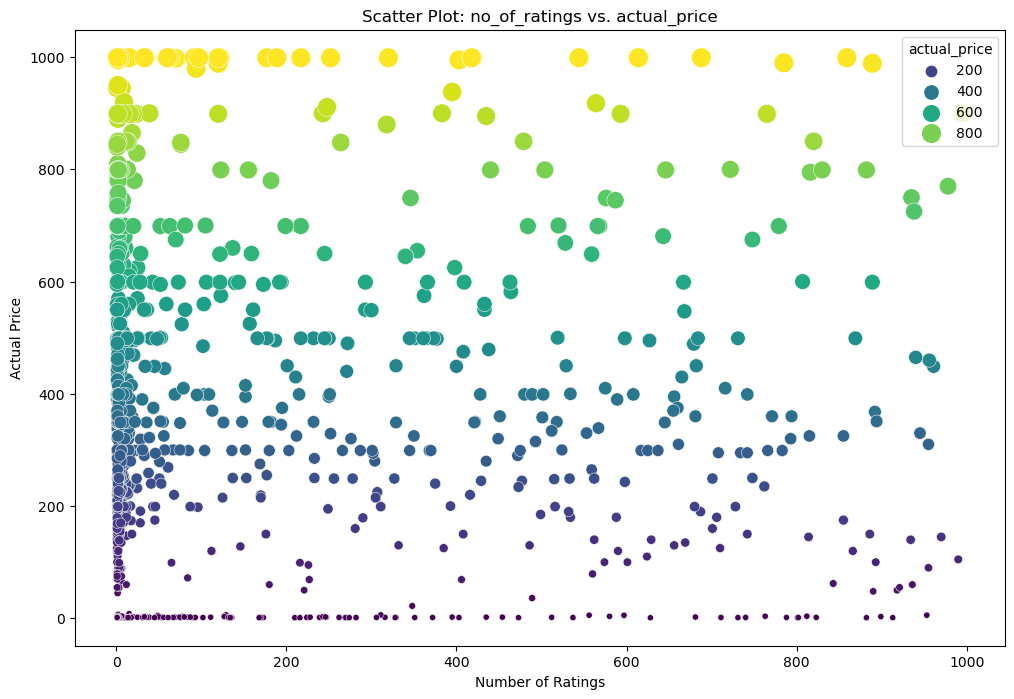

In [33]:
# Scatter plot actual_price x no_of_ratings
plt.figure(figsize=(12, 8))
sns.scatterplot(x='no_of_ratings', y='actual_price', data=df, hue='actual_price', palette='viridis', size='actual_price', sizes=(20, 200))
plt.title('Scatter Plot: no_of_ratings vs. actual_price')
plt.xlabel('Number of Ratings')
plt.ylabel('Actual Price')
plt.show()


# Statistical summary about prices.

In [34]:
print("Statistical summary of actual prices:")
print(df["actual_price"].describe())
print('')
print("Statistical summary of discount prices:")
print(df["discount_price"].describe())

Statistical summary of actual prices:
count    1092.000000
mean      352.845941
std       268.751014
min         1.000000
25%       160.000000
50%       300.000000
75%       500.000000
max       999.000000
Name: actual_price, dtype: float64

Statistical summary of discount prices:
count    1092.000000
mean      302.010620
std       240.463455
min         0.000000
25%       143.075000
50%       255.000000
75%       423.287500
max       999.000000
Name: discount_price, dtype: float64


# Exploring Product Categorization Using Machine Learning

In this Kaggle notebook, I am delving into the realm of product categorization using machine learning techniques. The objective is to automate the classification of products into distinct categories based on specific criteria, namely the number of ratings, ratings themselves, and the actual price of the products.

### Objective:
The primary goal is to develop a model that efficiently categorizes products into predefined classes, allowing for streamlined analysis and decision-making. This automated classification system can be valuable for businesses aiming to categorize and understand their products' performance in a scalable and efficient manner.

### Approach:
I have explored two different approaches. First, a rule-based system that calculates a total score for each product by considering weighted factors such as the number of ratings, ratings, and actual price. This score is then used to categorize the product into one of several predefined categories, ranging from "Very Poor" to "Very Good."

Second, a machine learning approach employing the Random Forest classifier. This model is trained on a dataset containing features like the number of ratings, ratings, and actual price, with the target variable being the product category. The resulting model is then evaluated for its accuracy and performance using a test dataset.

### Significance:
Automated product categorization is crucial for businesses dealing with a diverse range of products. It enhances decision-making processes, aids in inventory management, and contributes to a more organized understanding of product performance. By leveraging machine learning, this notebook aims to provide insights into effective product categorization strategies.

### Next Steps:
The next steps involve refining the models, exploring different algorithms, and potentially incorporating more features for a comprehensive analysis. Additionally, the models can be fine-tuned based on real-world feedback and evolving business requirements.

Feel free to run the code, explore the results, and provide any feedback or suggestions for improvement. Happy coding!

In [35]:
# Define categories
def categorize_product(row):
    if row['ratings'] >= 4.0:
        return 'Very Good'
    elif 3 <= row['ratings'] < 4:
        return 'Good'
    elif 2 <= row['ratings'] < 3:
        return 'Medium'
    elif 1 <= row['ratings'] < 2:
        return 'Poor'
    else:
        return 'Very Poor'


# Assign categories to products
df['category'] = df.apply(categorize_product, axis=1)

# Display the DataFrame with assigned categories
print(df[['no_of_ratings', 'ratings', 'actual_price', 'category']])


      no_of_ratings  ratings  actual_price   category
0             6.318      4.3         545.0  Very Good
1           217.000      4.3         999.0  Very Good
2             3.926      4.2         750.0  Very Good
3            18.350      4.2         349.0  Very Good
4            10.744      4.4         358.0  Very Good
...             ...      ...           ...        ...
1099          1.682      3.8         699.0       Good
1100         13.000      4.0         499.0  Very Good
1101        421.000      4.0         349.0  Very Good
1102        562.000      4.1         249.0  Very Good
1103          1.283      4.4         490.0  Very Good

[1092 rows x 4 columns]


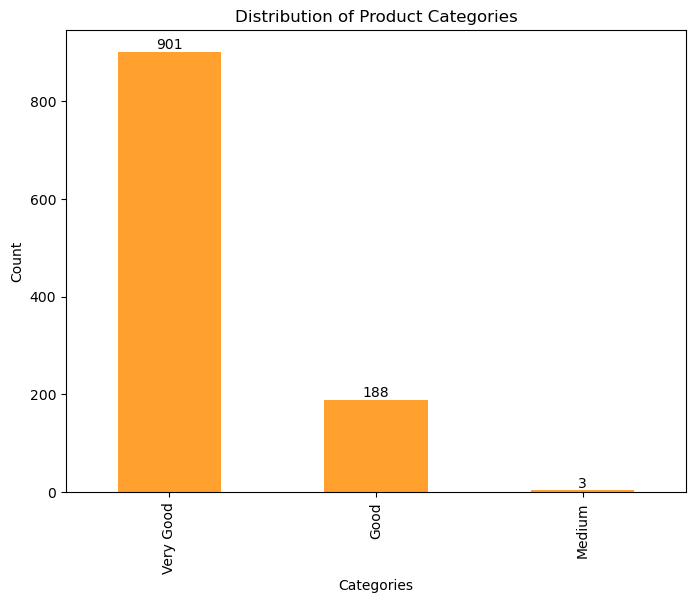

In [36]:
category_counts = df['category'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
ax = category_counts.plot(kind='bar', color=orange)
plt.title('Distribution of Product Categories')
plt.xlabel('Categories')
plt.ylabel('Count')

# Add data labels to each bar
for i, count in enumerate(category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selecione as colunas desejadas, incluindo 'ratings'
columns = ['actual_price', 'no_of_ratings', 'discount_price', 'ratings']

# Divida os dados entre as instâncias abaixo do limiar e as instâncias acima ou igual ao limiar
df_below_threshold = df[df['ratings'] < 3.5]
df_above_threshold = df[df['ratings'] >= 3.5]

# Divida os dados acima do limiar em treinamento e teste
X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(
    df_above_threshold[columns[:-1]], df_above_threshold['ratings'], test_size=0.2, random_state=42
)

# Combine os dados da classe majoritária com os dados da classe minoritária
X_train_combined = pd.concat([X_train_above, df_below_threshold[columns[:-1]]])
y_train_combined = pd.concat([y_train_above, df_below_threshold['ratings']])

# Crie e treine um modelo de regressão (pode ajustar o modelo conforme necessário)
model = RandomForestRegressor(random_state=42)
model.fit(X_train_combined, y_train_combined)

# Faça previsões no conjunto total
y_pred = model.predict(df[columns[:-1]])

# Avalie o modelo (por exemplo, calculando o erro médio quadrático)
mse = mean_squared_error(df['ratings'], y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.02567406776556779


In [38]:
# Suponha que 'df' seja o seu DataFrame
very_poor_products = df[df['category'] == 'Medium']

# Exiba os produtos classificados como 'Very Poor'
print(very_poor_products.head())


                                                   name  \
477   Bejoy Foam Toothpaste Stain Removal Toothpaste...   
910   NEUD Xpose Yourself Hair Remover Spray with Re...   
1077  PYU ENJOY SHOPPING Rotating Electric 360 Cordl...   

                                                   link  ratings  \
477   https://www.amazon.in/Bejoy-Toothpaste-Sensiti...      2.4   
910   https://www.amazon.in/NEUD-Xpose-Yourself-Remo...      2.9   
1077  https://www.amazon.in/PYU-Rotating-Electric-Re...      2.9   

      no_of_ratings  discount_price  actual_price category  
477            51.0         275.000       500.000   Medium  
910            33.0         229.000       290.000   Medium  
1077          246.0           1.249         2.399   Medium  


In [39]:
df['pred_ratings'] = y_pred

In [40]:
predicted_rating = model.predict(pd.DataFrame({  'actual_price': [50], 'no_of_ratings': [2],'discount_price': [0]}))
predicted_rating

array([4.32])